# Lab 3 Notebook
written by Corey Beard ccbeard@uci.edu

This notebook will attempt to simulate Physics 52C Lab 3. Certain cells will be editable, and are meant to mimic students adjusting settings on laboratory equipment. Certain cells are uneditable, and are meant to simulate nature, producing values as read by your instrument, depending on your settings.


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

This notebook works best with Python version 3. Most of you should have Version 3 installed, but just in case below will let you check the version. If it is Python Version 2.7 (Python 2) recommend installing verison 3 via conda or pip.

In [2]:
from platform import python_version
print(python_version())

3.7.4


## 3.3.2 Geiger Tube Operating Voltage

This next cell will imitate determining what voltage to use for the Geiger Counter. The lab manual asks you to take data points at different voltage values to determine which is best. Starting at 710, input voltage values in 10 V intervals when the script asks you to. Delineated by spaces.

Enter the voltage values you are measuring, delineated by spaces:


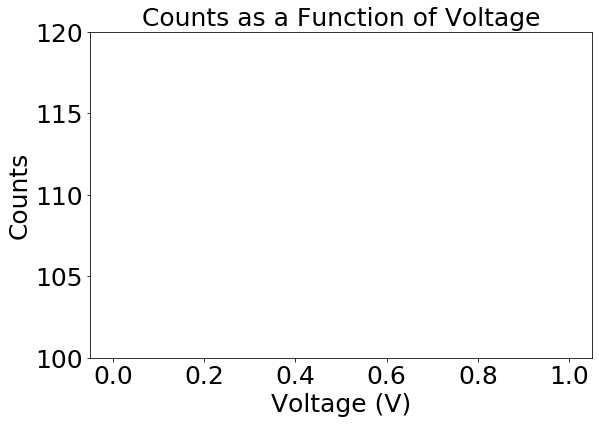

In [36]:
#Running this cell will imitate students taking data at each voltage value
voltages = np.array((list(map(float, input('Enter the voltage values you are measuring, delineated by spaces:').split()))))
def counts(v):
    if v > 775 and v < 870:
        return 108.0 + v*0.001 + np.random.normal(0,0.2)
    elif v <= 775:
        return v*(0.139)  + np.random.normal(0,0.3)
    elif v >= 870 and v < 900:
        return v*(0.127)  + np.random.normal(0,0.3)
    elif v >= 900:
        print('Voltage Too High')

vcounts = []
for i in range(len(voltages)):
    vcounts.append(counts(voltages[i]))

#Plot properties
fig= plt.figure(figsize=(9,6))
plt.scatter(voltages,vcounts,color='k')
plt.tick_params(axis='both', which='major', labelsize=25) 
plt.xlabel('Voltage (V)', fontsize = 25)
plt.ylabel('Counts', fontsize = 25)
plt.ylim(100,120)
plt.title('Counts as a Function of Voltage', fontsize = 25)

plt.show()

Around what voltage value do the readings begin to level out?

## 3.3.3 Gaussian Distribution

Now we will take data in ~6 second intervals, aiming to reach about 100 counts per interval. We will take 100 measurments, and plot this. It should be, approximately, a Gaussian distribution.

This next cell should be edited by you, and determines what settings and methods to use. Consult the lab manual (text in Section 3.3.3 page 32) to determine these values. Rest of the notebok requires you follow the lab manual and the notebook has section numbers matched to the manual. 

Note the distance should not be changed, its fixed at 1 m.

In [4]:
##### Settings #########

Timeinterval =  #time interval in seconds

Nruns =  #Number of measurments to take

Count_Rate =  #the amount of counts expected in a 6 second interval when 1 meter away

Distance = 1 #distance of the source from the detector, in meters.
            #Should be 1 m until the very last section of lab

This next cell represents the readings of your instrument and **should not be edited**

In [8]:
counts = []
for i in range(int(Nruns)):
    counts.append(Timeinterval*(1/Distance)**2*Count_Rate/6 + np.random.normal(0,np.sqrt(Count_Rate)))

countsdf = pd.DataFrame(counts)    
countsdf100 = countsdf.rename(columns={0:'Counts'})
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(countsdf100)

        Counts
0   110.202529
1   119.841788
2   107.265498
3    98.645236
4   105.540718
5   104.357574
6   106.154312
7    87.055344
8    93.902523
9    95.902567
10  102.576573
11   91.184449
12  105.175750
13   98.612145
14   97.589043
15   81.089713
16  103.043768
17   92.367584
18  107.411787
19   81.179943
20  104.908436
21  103.373060
22   99.081964
23   99.434409
24   82.510057
25   84.840397
26  112.323967
27   85.815464
28  102.040900
29   86.320827
30  119.002747
31   93.729100
32   75.643372
33   84.542109
34  101.676937
35  100.887835
36  109.152691
37   76.103047
38  102.257347
39   95.162006
40  110.033485
41   86.624518
42   99.458030
43   93.382480
44   91.355784
45   89.959655
46  104.832768
47  103.559492
48  101.441880
49  116.871544
50  101.665354
51   89.946859
52  106.444309
53   82.542413
54  118.253712
55  112.107543
56  115.278304
57  108.240695
58  102.693886
59  104.259645
60  120.220148
61  108.366371
62  108.398260
63   86.952255
64   99.048073
65  100.05

Use the next blank cell to plot a histogram of the data with a guassian overlayed, as well as to calculate the mean and standard deviation. Be sure to follow lab manual instructions, including binning the data as instructed.

This next cell is an example of how to calculate all these values, and the result you should expect:

Mean:
Counts    99.543554
dtype: float64
Standard Deviation
Counts    10.722003
dtype: float64
Standard Error on Mean
Counts    1.0722
dtype: float64


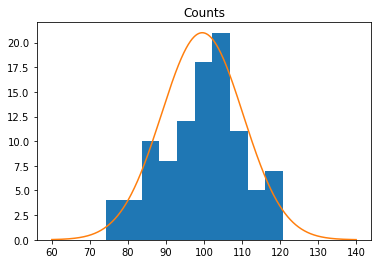

In [12]:
#Now plot a histogram
mu = countsdf100.mean()
sigma = countsdf100.std()
sem = countsdf100.sem()

counts = countsdf100.to_numpy()
plt.hist(counts)
x = np.linspace(60,140,1000)
y=[]
max = np.max(np.histogram(counts)[0])
for i in x:
    y.append(max*np.exp(-(0.5)*((i-mu)/sigma)**2))
plt.plot(x,y)
plt.title('Counts')

print('Mean:')
print(mu)
print('Standard Deviation')
print(sigma)
print('Standard Error on Mean')
print(sem)

**Compare your results quantatively to the expected probabilities of falling in each bin. Are your results what you expect?**

# 3.3.4 Standard Deviation

In a counting experiment standard deviation $\sigma$ should be equal to the square root of the average number counts.

Follow Section 3.3.4 of the manual, page 34.

To begin distance remains fixed at 1 m. Now increase the count rate so that you get 1000 counts in a 6 second interval, and then run 10 such intervals. 

**Edit below to change settings.**

In [25]:
##### Settings #########

Timeinterval =  #time interval in seconds

Nruns =   #Number of measurments to take

Count_Rate =   #the amount of counts expected in a 6 second interval when 1 meter away

Distance = 1 #distance of the source from the detector, in meters.
            #Should be 1 m until the very last section of lab

This next cell represents the readings of your counter and **should not be edited.**

In [26]:
counts = []
for i in range(int(Nruns)):
    counts.append(Timeinterval*(1/Distance)**2*Count_Rate/6 + np.random.normal(0,np.sqrt(Count_Rate/6*Timeinterval)))
    
countsdf1000 = pd.DataFrame(counts)
countsdf1000 = countsdf1000.rename(columns={0:'Counts'})
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(countsdf1000)

         Counts
0    977.682321
1   1089.693829
2    997.730536
3   1003.376444
4   1026.340645
5   1029.851807
6    989.453373
7   1001.062850
8    999.573254
9    995.890956
10   985.770862
11  1029.484541
12  1006.159869
13  1026.070072
14  1018.164203
15   976.980441
16   986.095481
17  1031.968427
18  1024.914669
19   986.899846
20  1029.725270
21  1035.347946
22  1001.293435
23  1022.715944
24  1010.652966
25  1036.988682
26   982.467608
27  1007.546501
28  1055.505179
29  1030.415696
30  1048.760509
31  1058.114823
32   973.225260
33   913.754155
34  1019.780964
35  1022.481848
36  1023.218640
37   956.781125
38  1007.517661
39  1039.621369
40  1021.797313
41  1039.785088
42  1011.173969
43  1020.396838
44  1014.069220
45  1025.124131
46  1026.868623
47   938.754708
48  1062.736676
49  1004.092834
50  1008.120929
51   961.022896
52  1001.713334
53  1017.163172
54  1057.057037
55  1002.710589
56  1010.270866
57   972.014291
58  1049.691361
59  1030.085456
60  1006.267158
61  1000

Now calculate the mean and standard deviation of the above data:

Now do the same with distance still fixed at 1 m, but in intervals 60 seconds long, instead of 6 seconds long. Count rate remains as the rate above. 

**Be sure to edit and rerun the settings cell for changes!**

In [27]:
##### Settings #########

Timeinterval =   #time interval in seconds

Nruns =  #Number of measurments to take

Count_Rate =  #the amount of counts expected in a 60 second interval when 1 meter away

Distance = 1 #distance of the source from the detector, in meters.
            #Should be 1 m until the very last section of lab

The next cell represents counts measured by your instrument and **should not be edited.**

In [28]:
counts = []
for i in range(int(Nruns)):
    counts.append(Timeinterval*(1/Distance)**2*Count_Rate/6 + np.random.normal(0,np.sqrt(Count_Rate/6*Timeinterval)))
    
countsdf10000 = pd.DataFrame(counts)
countsdf10000 = countsdf10000.rename(columns={0:'Counts'})
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(countsdf10000)

          Counts
0   10041.687937
1   10046.112722
2    9995.781786
3    9900.265432
4   10154.513732
5   10123.005817
6   10037.942175
7    9992.094975
8   10137.510343
9   10042.235155
10   9767.700864
11  10020.160705
12   9963.643638
13  10123.229511
14  10035.576605
15  10025.035100
16  10053.367977
17  10060.197664
18  10203.790012
19   9929.315958
20   9885.916005
21  10082.763499
22   9968.475573
23  10000.731308
24   9911.690309
25   9979.039617
26   9986.685033
27  10075.589487
28   9902.885192
29  10147.925255
30   9900.641380
31  10005.413288
32  10053.907046
33  10012.926878
34  10157.715672
35  10091.451584
36   9993.339759
37  10133.726097
38   9869.967032
39  10056.384331
40   9906.347485
41   9871.503171
42  10066.778260
43   9989.916714
44  10272.314823
45   9888.392149
46  10066.633619
47  10101.769484
48  10036.984568
49   9882.943805
50  10078.073643
51  10046.270348
52  10303.052349
53   9919.824074
54  10125.395232
55   9967.760924
56   9874.371853
57   9854.3879

Now calculate the mean and standard deviation of the above data:

Now change the distance in the settings until the average counts per run is about 10 for a 6 second interval. 

Note counts go as inverse distance and the rate was set at 1000 counts for a 6 second interval.

**Be sure to edit and rerun the settings cell for changes**

In [29]:
##### Settings #########

Timeinterval =  #time interval in seconds

Nruns =  #Number of measurments to take

Count_Rate =  #the amount of counts expected in a 6 second interval when 1 meter away

Distance =  #distance of the source from the detector, in meters.
            #At 1 m count rate is 1000, need a distance so count rate is 10.

This next cell represents counts measured by your instrument and **should not be edited.**

In [30]:
counts = []
for i in range(int(Nruns)):
    counts.append(Timeinterval*(1/Distance)**2*Count_Rate/6 + np.random.normal(0,np.sqrt(Count_Rate)/Distance))
    
countsdf10 = pd.DataFrame(counts)
countsdf10 = countsdf10.rename(columns={0:'Counts'})
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(countsdf10)

       Counts
0   11.722346
1   12.710150
2    4.692488
3   11.928203
4   11.578920
5   11.333808
6    9.102510
7   11.040433
8    6.408161
9    7.340046
10   5.624088
11   9.381952
12  12.622031
13   8.986260
14  10.605386
15   6.721530
16   8.775728
17  10.667928
18  11.324156
19   9.607175
20   4.778036
21  15.212064
22  11.769083
23  13.394249
24  13.037651
25  10.561922
26  10.123416
27   8.490052
28  13.209958
29  13.835064
30   7.286244
31   6.183271
32   9.003639
33   9.202118
34  10.333893
35  11.912223
36   7.750155
37   5.105002
38   9.487377
39   8.618649
40  10.863103
41  14.858777
42  11.523852
43   3.025855
44   3.452367
45   3.755276
46  16.149319
47   8.498628
48   8.766796
49  14.724385
50   7.060439
51   7.740045
52   9.694047
53  15.811319
54  11.868837
55  17.161984
56  12.364025
57   8.346857
58   0.961173
59   9.719128
60   8.863871
61   8.834047
62   7.527729
63  13.644275
64   0.510959
65   9.193338
66   7.938799
67  12.234230
68  13.494122
69   9.511339
70  11

Now calculate the mean and standard deviation of the above data:

Now prepare a table of $\bar{n}$, $\sigma$, $\sqrt{\bar{n}}$, $\frac{\sigma}{\bar{n}}$, and $\frac{\sigma}{\sqrt{\bar{n}}}$ for each of the four cases $\bar{n}$ = 10, 100, 1000, and 10000. Is $\sigma$ = $\sqrt{\bar{n}}$?

Below is to help define the table and should not be edited:

In [31]:
def values(df):
    N = float(df.mean())
    sig =float(df.std())
    thing = [N,sig,np.sqrt(N),sig/N,sig/np.sqrt(N)]
    return thing

Below writes data to a table and again should not be edited:

In [32]:
array = [values(countsdf10),values(countsdf100),values(countsdf1000),values(countsdf10000)]
table = pd.DataFrame(array,index=['10','100','1000','10000'],columns=['$n$','$\sigma$','$\sqrt{n}$',\
                                                                '$\sigma/n$'\
                                                                ,'$\sigma/\sqrt{n}$'])
table

,$n$,$\sigma$,$\sqrt{n}$,$\sigma/n$,$\sigma/\sqrt{n}$
10,9.704501,3.451435,3.115205,0.355653,1.107932
100,99.543554,10.722003,9.977152,0.107712,1.074656
1000,1007.196667,32.283506,31.736362,0.032053,1.017240
10000,10005.906902,106.415662,100.029530,0.010635,1.063842


Is $\sigma$ roughly equal to $\sqrt{n}$? You may want to rerun the notebook with a larger number of runs (100 instead of 10) to see if that makes any difference.

# 3.4 Reflection Questions

1. The counts increase fairly erratically as time passes. Why is this?

2. Why don't your data in section 3.3.2 on the Geiger tube operating voltage change as smoothly as in figure 3.2 of P52C Lab book?

3. Did your data in section 3.3.3 agree very well with the normal distribution? What could you do to improve their agreement?

4. A reasonable measure of the accuracy of the measurement is the fractional variation in the number of counts $\frac{\sigma}{n}$. Ideally, to achieve excellent temporal resolution, one would use very short time bins ($\Delta t$) but, in practice, the bin duration $\Delta t$ is determined by the required accuracy. For example, in an x-ray measurement, one may have to sacrifice accuracy to obtain better temporal resolution because the flux of photons is limited. How large does n need to be to achieve $\sim 10 \%$ uncertainty in a counting experiment? To achieve $\sim 1 \%$ accuracy? 